In [72]:
#Install Pandas (For CI Success) - Have to install Locally
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [73]:
#Install Matplotlib (For CI Success) - Have to install Locally
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [74]:
#importing libraries and creating a data frame of the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [75]:
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})

In [76]:
#Read Google Play Store CSV
df=pd.read_csv('../googleplaystore.csv') 

In [77]:
#printing top rows
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [79]:
#Get Shape of Data Set
print("The Shape of data in (sample, features): ", df.shape)
#Get Data Types of Data Set
print("Data Types: \n", df.dtypes.value_counts())

The Shape of data in (sample, features):  (10841, 13)
Data Types: 
 object     12
float64     1
dtype: int64


In [80]:
#First Clean Size Column
#Count frequency of each item in the Size Column
df.Size.value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
809k                     1
8.5k                     1
904k                     1
154k                     1
458k                     1
Name: Size, Length: 462, dtype: int64

In [81]:
#Removing M's and k's to convert string to numeric values
df.Size = df.Size.str.replace('M','e+6')
df.Size = df.Size.str.replace('k','e+3')
df.Size.head()

0     19e+6
1     14e+6
2    8.7e+6
3     25e+6
4    2.8e+6
Name: Size, dtype: object

In [82]:
#Creating a function to check if every item from Size is convertible to numeric data or not
def is_item_convertible_to_numeric(item):
    try:
        float(item)
        return True
    except ValueError:
        return False

In [83]:
#Create a temp data frame which is a boolean array contains true for all float items
df_temp = df.Size.apply(lambda x: is_item_convertible_to_numeric(x))
df_temp.head()

0    True
1    True
2    True
3    True
4    True
Name: Size, dtype: bool

In [84]:
df.Size[~df_temp].value_counts()

Varies with device    1695
1,000+                   1
Name: Size, dtype: int64

In [85]:
#Replacing "Nan" by "Varies with Device"
df.Size = df.Size.replace('Varies with device', np.nan)

In [86]:
#Replacing 1,000+ by 1000 to convert it into numeric
df.Size = df.Size.replace('1,000+', 1000) 

In [87]:
#Now converting the Cleaned Data of Column Size into Numeric by using Pandas
df.Size = pd.to_numeric(df.Size)

Text(0, 0.5, 'Frequency')

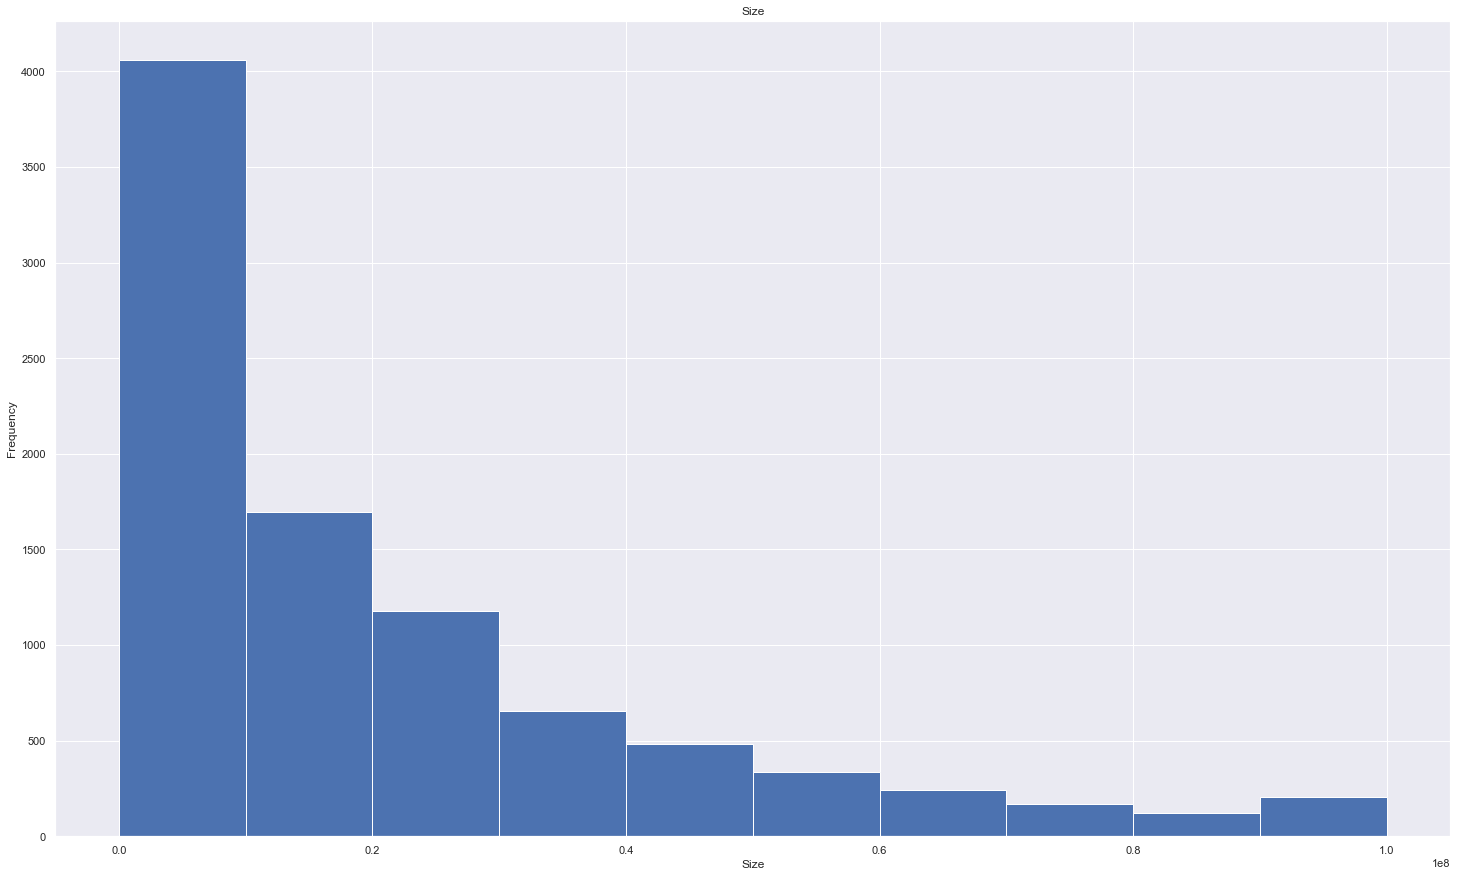

In [88]:
#Plotting histogram for Column Size (Frequency)
df.hist(column='Size')
plt.xlabel('Size')
plt.ylabel('Frequency')

In [89]:
#Renaming the column name for removing spaces
df.rename(columns={'Content Rating':'Content_Rating', 'Last Updated':'Last_Updated', 'Current Ver':'Current_Ver','Android Ver':'Android_Ver'}, inplace=True)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [90]:
df.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [91]:
df[df.Category=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,1000.0,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [92]:
#Finding index of category 1.9 and dropping that row
df.drop(10472,axis=0,inplace=True)
df[df.Category=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver


In [93]:
#Dropping null rating by creating a list of those indices which have null values
drop_nullrating_index=df[df.Rating.isnull()].index
drop_nullrating_index=list(drop_nullrating_index)
df.drop(drop_nullrating_index,inplace=True)
df[df.Rating.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver


In [94]:
df.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [95]:
#Removing character from the values
df.Installs = df.Installs.str.replace('+','')
df.Installs = df.Installs.str.replace(',','')
df.Installs=df.Installs.astype('int')
df.Installs.unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1])

In [96]:
df.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [97]:
#Cleaning Price
#Removing dollar sign
df.Price = df.Price.str.replace('$','')

In [98]:
#Printing unique price values
df.Price.unique()

array(['0', '4.99', '3.99', '6.99', '7.99', '5.99', '2.99', '3.49',
       '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00', '24.99',
       '11.99', '79.99', '16.99', '14.99', '29.99', '12.99', '2.49',
       '10.99', '1.50', '19.99', '15.99', '33.99', '39.99', '3.95',
       '4.49', '1.70', '8.99', '1.49', '3.88', '399.99', '17.99',
       '400.00', '3.02', '1.76', '4.84', '4.77', '1.61', '2.50', '1.59',
       '6.49', '1.29', '299.99', '379.99', '37.99', '18.99', '389.99',
       '8.49', '1.75', '14.00', '2.00', '3.08', '2.59', '19.40', '3.90',
       '4.59', '15.46', '3.04', '13.99', '4.29', '3.28', '4.60', '1.00',
       '2.95', '2.90', '1.97', '2.56', '1.20'], dtype=object)

In [99]:
#Converting Price object to float
df.Price=df.Price.astype('float')
#Price cleaned..

In [100]:
#Cleaning Genres
#Finding out indices of rows which have multiple genres
temp = np.array(df.Genres.str.find(';'))
ls = np.where(temp>0)

In [101]:
#Creating a temp dataframe which includes row data which have multiple genres
df2 = df.iloc[np.r_[ls],:]

In [102]:
#Getting shape of original dataframe
df.shape

(9366, 13)

In [103]:
#Getting shape of temp data frame
df2.shape

(483, 13)

In [104]:
#Splitting the genre column's data into an array and keeping the first genre only
df.Genres = df.Genres.apply(lambda x: x.split(';')[0])

In [105]:
#Displaying the head of temp dataframe
df2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3100000.0,10000,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up
26,Colorfit - Drawing & Coloring,ART_AND_DESIGN,4.7,20260,25000000.0,500000,Free,0.0,Everyone,Art & Design;Creativity,"October 11, 2017",1.0.8,4.0.3 and up
36,UNICORN - Color By Number & Pixel Art Coloring,ART_AND_DESIGN,4.7,8145,24000000.0,500000,Free,0.0,Everyone,Art & Design;Creativity,"August 2, 2018",1.0.9,4.4 and up


In [106]:
#Splitting the genre column's data into an array and keeping the seconf genre only
df2.Genres = df2.Genres.apply(lambda x: x.split(';')[1])

In [107]:
#Displaying the head of temp dataframe
df2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Creativity,"June 20, 2018",1.1,4.4 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3100000.0,10000,Free,0.0,Everyone,Creativity,"July 3, 2018",2.8,4.0.3 and up
26,Colorfit - Drawing & Coloring,ART_AND_DESIGN,4.7,20260,25000000.0,500000,Free,0.0,Everyone,Creativity,"October 11, 2017",1.0.8,4.0.3 and up
36,UNICORN - Color By Number & Pixel Art Coloring,ART_AND_DESIGN,4.7,8145,24000000.0,500000,Free,0.0,Everyone,Creativity,"August 2, 2018",1.0.9,4.4 and up


In [108]:
#Appending the data of second dataframe into the first one.  
df = df.append(df2, ignore_index=True)
#It clears out the problem of multiple genre and now there will be 2 entries of that app with different genres

In [109]:
#Displaying shape of original dataframe
df.shape

(9849, 13)

In [110]:
#Deleting the temp dataframe
del df2
#Genre Colum Cleaned.

In [111]:
#Displaying data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9849 entries, 0 to 9848
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9849 non-null   object 
 1   Category        9849 non-null   object 
 2   Rating          9849 non-null   float64
 3   Reviews         9849 non-null   object 
 4   Size            8146 non-null   float64
 5   Installs        9849 non-null   int32  
 6   Type            9849 non-null   object 
 7   Price           9849 non-null   float64
 8   Content_Rating  9849 non-null   object 
 9   Genres          9849 non-null   object 
 10  Last_Updated    9849 non-null   object 
 11  Current_Ver     9845 non-null   object 
 12  Android_Ver     9847 non-null   object 
dtypes: float64(3), int32(1), object(9)
memory usage: 961.9+ KB


In [112]:
#Changing the data type of Last updated to datetime from object.
df.Last_Updated = pd.to_datetime(df['Last_Updated']) 

In [113]:
#Cleaning Current_Version
#Getting data with version varies with devices
df[df.Current_Ver == "Varies with device"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
36,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,NaN,5000000,Free,0.0,Everyone,Art & Design,2018-07-14,Varies with device,2.3.3 and up
41,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,NaN,10000000,Free,0.0,Everyone,Art & Design,2018-07-30,Varies with device,Varies with device
51,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,NaN,1000000,Free,0.0,Everyone,Auto & Vehicles,2018-07-30,Varies with device,Varies with device
66,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,NaN,5000000,Free,0.0,Everyone,Auto & Vehicles,2018-07-30,Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9777,Duolingo: Learn Languages Free,FAMILY,4.7,6297590,NaN,100000000,Free,0.0,Everyone,Education,2018-08-06,Varies with device,Varies with device
9783,Dr. Panda Town,FAMILY,4.0,36578,NaN,1000000,Free,0.0,Everyone,Pretend Play,2018-08-03,Varies with device,Varies with device
9795,Star Chart,FAMILY,4.3,128808,NaN,10000000,Free,0.0,Everyone,Education,2018-08-02,Varies with device,Varies with device
9813,Surprise Eggs,FAMILY,3.9,81543,NaN,10000000,Free,0.0,Everyone,Pretend Play,2018-07-19,Varies with device,Varies with device


In [114]:
#Finding out the indices of row with version varies with data
vwd_indices = df[df['Current_Ver']=='Varies with device'].index

In [115]:
#Getting mode of the column Current Ver
df.Current_Ver.mode()

0    Varies with device
dtype: object

In [116]:
#Create a temp copy dataframe
df_temp=df.copy()

In [117]:
#Dropping the rows from temp dataframe which have current version value as varies with data
df_temp.drop(vwd_indices, axis=0, inplace=True)

In [118]:
#Now, Getting mode of temp dataframe
df_temp.Current_Ver.mode()

0    1.0
dtype: object

In [119]:
#Replacing Varies with device in original dataframe with next best most occurances of values in Current_Ver column
df.Current_Ver = df.Current_Ver.replace('Varies with device', '1.0')
#Current_Ver column cleaned

In [120]:
#Deleting the temp dataframe
del df_temp

In [121]:
#Checking if any duplicate data are available
df[df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
218,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000,Free,0.00,Everyone,Business,2018-02-26,1.0,4.0.3 and up
225,Box,BUSINESS,4.2,159872,NaN,10000000,Free,0.00,Everyone,Business,2018-07-31,1.0,Varies with device
228,Google My Business,BUSINESS,4.4,70991,NaN,5000000,Free,0.00,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up
245,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37000000.0,10000000,Free,0.00,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up
250,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,1000000,Free,0.00,Everyone,Business,2018-07-16,4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9782,Cursive Writing Wizard - Handwriting,FAMILY,4.0,3745,31000000.0,1000000,Free,0.00,Everyone,Education,2017-12-03,2.5.0,4.0.3 and up
9795,Star Chart,FAMILY,4.3,128808,NaN,10000000,Free,0.00,Everyone,Education,2018-08-02,1.0,Varies with device
9804,EF Spelling Bee,FAMILY,3.0,2,9400000.0,500,Free,0.00,Everyone,Education,2017-10-12,1.2.2,4.3 and up
9806,EG Classroom Decimals™,FAMILY,3.0,2,18000000.0,50,Paid,2.99,Everyone,Education,2017-06-12,2.2.2,2.2 and up


In [122]:
#Dropping duplicates
df.drop_duplicates(keep='first', inplace=True)

In [123]:
#Reset the index values
df.reset_index(inplace=True)
df.drop('index',axis=1, inplace=True)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,1.0,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design,2018-06-20,1.1,4.4 and up


In [124]:
# Converting the Reviews Column to an integer data type
df['Reviews'] = df['Reviews'].apply(lambda x: int(x))

In [125]:
#Displaying current data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9295 entries, 0 to 9294
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9295 non-null   object        
 1   Category        9295 non-null   object        
 2   Rating          9295 non-null   float64       
 3   Reviews         9295 non-null   int64         
 4   Size            7773 non-null   float64       
 5   Installs        9295 non-null   int32         
 6   Type            9295 non-null   object        
 7   Price           9295 non-null   float64       
 8   Content_Rating  9295 non-null   object        
 9   Genres          9295 non-null   object        
 10  Last_Updated    9295 non-null   datetime64[ns]
 11  Current_Ver     9291 non-null   object        
 12  Android_Ver     9293 non-null   object        
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1), object(7)
memory usage: 907.8+ KB


In [127]:
df.to_csv('../googleplaystore_clean.csv') 